# Figure - 3.2: Iron-sensitive modalities and maps

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

Shape of STAGE_T2S_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_T2S_MIP_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_CROWN_T2S_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_CROWN_T2S_A2_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_R2S_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_R2S_MIP_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_CROWN_R2S_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_CROWN_R2S_A2_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_SWI_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_SWI_mIP_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_HPF_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_tSWI_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_tSWI_mIP_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_tSWIhpf_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_pSWIM_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_mpSWIM_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_meSWIM_reg_mni.nii.g

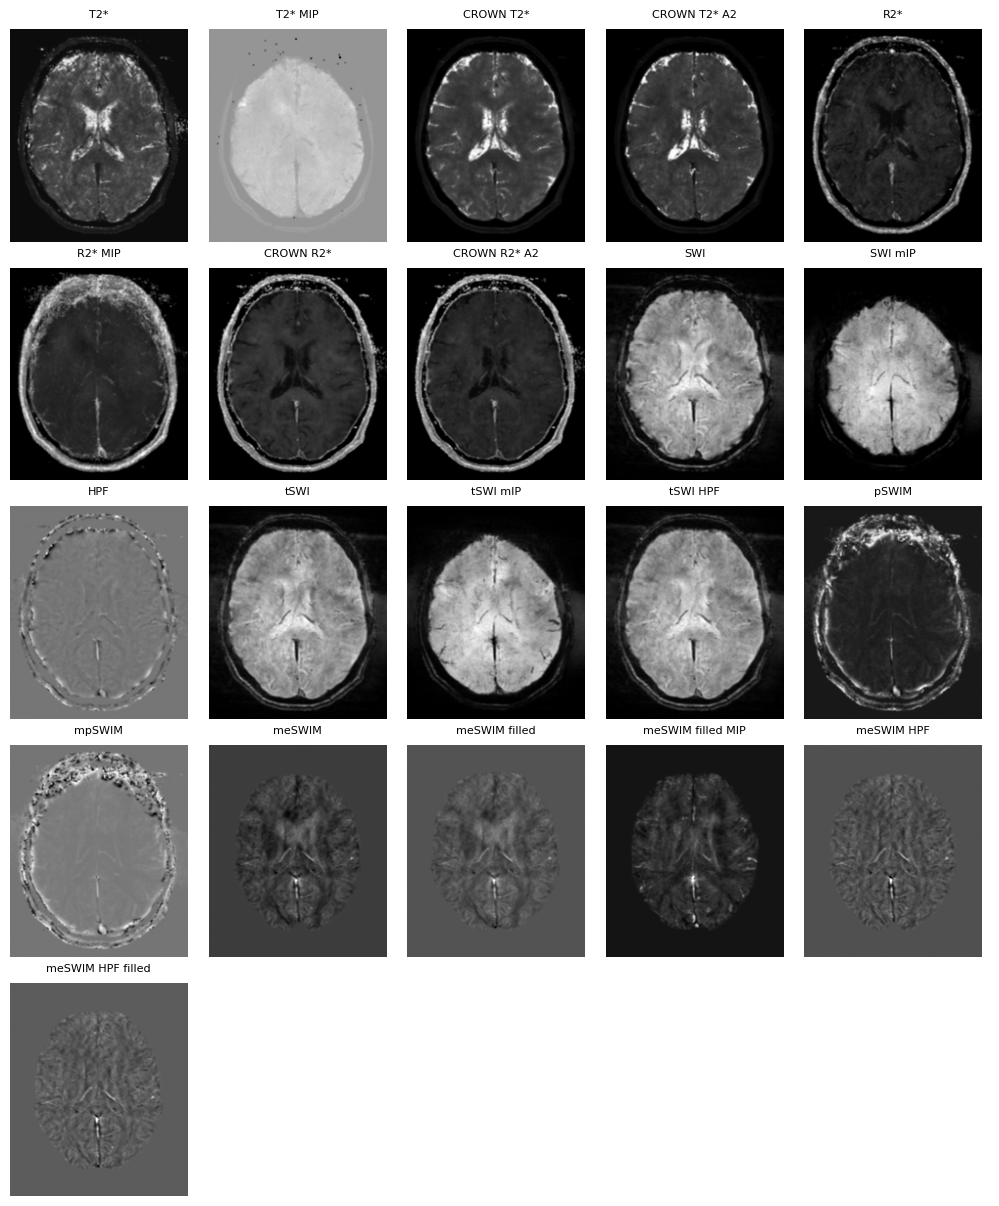

In [2]:
# randomly selected pigd patient
base_dir = "/hus/home/oliwin/data/study_name/00006431/FSL"

# all iron-sensitive modalities and maps
modalities = [
    "STAGE_T2S_e3_reg_mni.nii.gz",
    "STAGE_T2S_MIP_e3_reg_mni.nii.gz",
    "STAGE_CROWN_T2S_reg_mni.nii.gz",
    "STAGE_CROWN_T2S_A2_reg_mni.nii.gz",
    "STAGE_R2S_e3_reg_mni.nii.gz",
    "STAGE_R2S_MIP_e3_reg_mni.nii.gz",
    "STAGE_CROWN_R2S_reg_mni.nii.gz",
    "STAGE_CROWN_R2S_A2_reg_mni.nii.gz",
    "STAGE_SWI_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_SWI_mIP_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_HPF_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_tSWI_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_tSWI_mIP_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_tSWIhpf_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_pSWIM_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_mpSWIM_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_meSWIM_reg_mni.nii.gz",
    "STAGE_meSWIM_filled_reg_mni.nii.gz",
    "STAGE_meSWIM_filled_MIP_reg_mni.nii.gz",
    "STAGE_meSWIM_HPF__reg_mni.nii.gz",
    "STAGE_meSWIM_HPF_filled_reg_mni.nii.gz"
]

# defining names as they would appear on the collage
title_map = {
    "STAGE_T2S_e3_reg_mni.nii.gz": "T2*",
    "STAGE_T2S_MIP_e3_reg_mni.nii.gz": "T2* MIP",
    "STAGE_CROWN_T2S_reg_mni.nii.gz": "CROWN T2*",
    "STAGE_CROWN_T2S_A2_reg_mni.nii.gz": "CROWN T2* A2",
    "STAGE_R2S_e3_reg_mni.nii.gz": "R2*",
    "STAGE_R2S_MIP_e3_reg_mni.nii.gz": "R2* MIP",
    "STAGE_CROWN_R2S_reg_mni.nii.gz": "CROWN R2*",
    "STAGE_CROWN_R2S_A2_reg_mni.nii.gz": "CROWN R2* A2",
    "STAGE_SWI_ECHO-3_e3_reg_mni.nii.gz": "SWI",
    "STAGE_SWI_mIP_ECHO-3_e3_reg_mni.nii.gz": "SWI mIP",
    "STAGE_HPF_ECHO-3_e3_reg_mni.nii.gz": "HPF",
    "STAGE_tSWI_ECHO-3_e3_reg_mni.nii.gz": "tSWI",
    "STAGE_tSWI_mIP_ECHO-3_e3_reg_mni.nii.gz": "tSWI mIP",
    "STAGE_tSWIhpf_ECHO-3_e3_reg_mni.nii.gz": "tSWI HPF",
    "STAGE_pSWIM_ECHO-3_e3_reg_mni.nii.gz": "pSWIM",
    "STAGE_mpSWIM_ECHO-3_e3_reg_mni.nii.gz": "mpSWIM",
    "STAGE_meSWIM_reg_mni.nii.gz": "meSWIM",
    "STAGE_meSWIM_filled_reg_mni.nii.gz": "meSWIM filled",
    "STAGE_meSWIM_filled_MIP_reg_mni.nii.gz": "meSWIM filled MIP",
    "STAGE_meSWIM_HPF__reg_mni.nii.gz": "meSWIM HPF",
    "STAGE_meSWIM_HPF_filled_reg_mni.nii.gz": "meSWIM HPF filled"
}

font_size = max(8, 20 * (6 / 20)) 

# creating 5x5 grid 
fig, axes = plt.subplots(5, 5, figsize=(10, 12)) 
axes = axes.ravel()

# plot the images
for i, modality in enumerate(modalities):
    img = nib.load(os.path.join(base_dir, modality))
    img_data = img.get_fdata()
    print(f"Shape of {modality}: {img_data.shape}")
    
    ax = axes[i]

    # middle slice (z-axis index)
    z_slice_index = img_data.shape[2] // 2  

    img_data = img_data - np.min(img_data)
    img_data = img_data / np.max(img_data)
    slice_data = img_data[:, :, z_slice_index]

    # rotating all images 90 degrees and displaying
    rotated_slice = np.rot90(slice_data)
    new_title = title_map.get(modality, modality.replace('.nii.gz', ''))  
    ax.imshow(rotated_slice, cmap='gray')
    ax.set_title(new_title, fontsize=font_size, pad=8)  
    ax.axis('off')

# hide axes for remaining empty subplots
for j in range(len(modalities), len(axes)):
    axes[j].axis('off') 


plt.subplots_adjust(wspace=0.1, hspace=0.1) 
plt.tight_layout(pad=0.5)  

collage = "/hus/home/oliwin/data/study_name/iron_sensitive.png"
plt.savefig(collage, dpi=600) 
plt.show()

# Figure - 3.3: Non-iron sensitive modalities and maps

Shape of STAGE_PD_MAP_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_CROWN_PD_MAP_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_TRUE_PD_MAP_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_CROWN_TRUE_PD_MAP_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_CROWN_TRUE_PD_MAPa_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_T1MAP_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_T1WE_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_sim_GRE_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_sim_GREa_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_simFLAIR_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_dSWI_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_dSWI_mIP_ECHO-3_e3_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_simCSF_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_simGM_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_simWM_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_KMAP_reg_mni.nii.gz: (182, 218, 182)
Shape of STAGE_MRA_e3_reg_mni.nii.gz: (182, 218, 182)


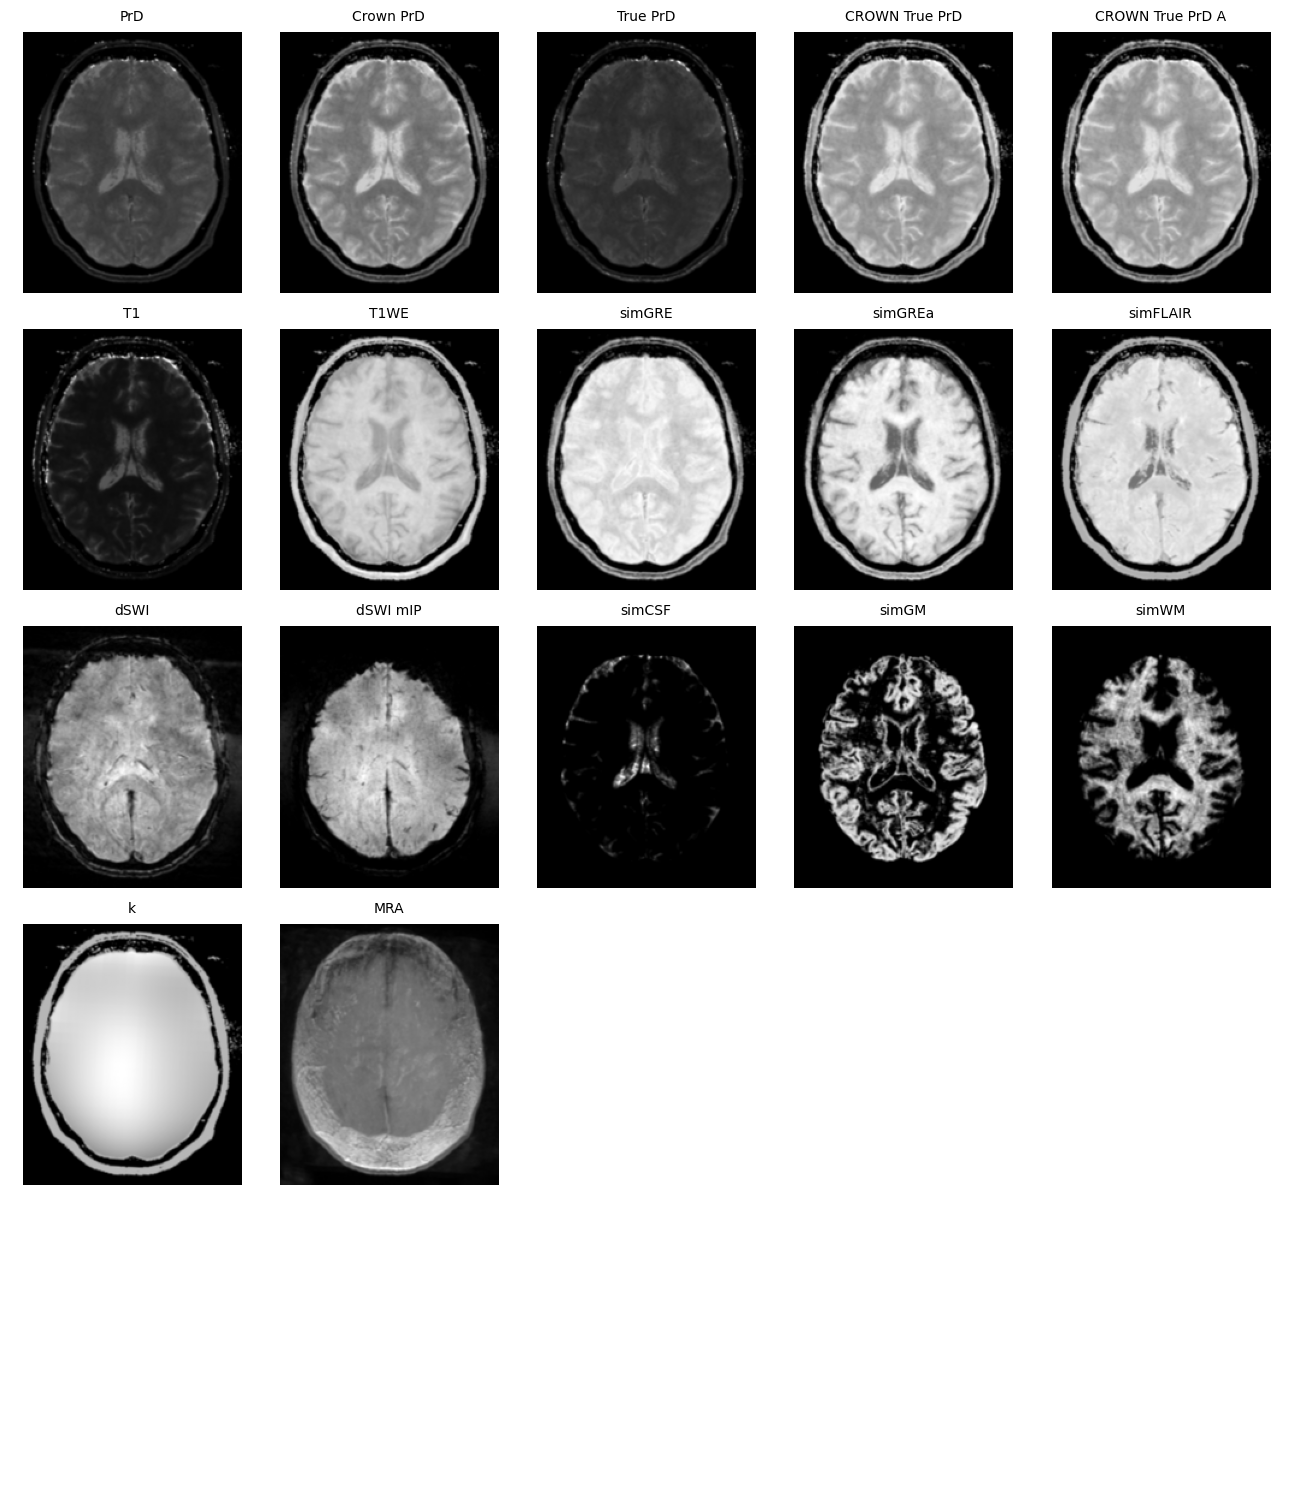

In [3]:
# randomly selected pigd patient
base_dir = "/hus/home/oliwin/data/study_name/00006431/FSL"

# all non-iron sensitive modalities and maps
modalities = [
    "STAGE_PD_MAP_reg_mni.nii.gz",
    "STAGE_CROWN_PD_MAP_reg_mni.nii.gz",
    "STAGE_TRUE_PD_MAP_reg_mni.nii.gz",
    "STAGE_CROWN_TRUE_PD_MAP_reg_mni.nii.gz",
    "STAGE_CROWN_TRUE_PD_MAPa_reg_mni.nii.gz",
    "STAGE_T1MAP_reg_mni.nii.gz",
    "STAGE_T1WE_reg_mni.nii.gz",
    "STAGE_sim_GRE_reg_mni.nii.gz",
    "STAGE_sim_GREa_reg_mni.nii.gz",  
    "STAGE_simFLAIR_reg_mni.nii.gz",
    "STAGE_dSWI_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_dSWI_mIP_ECHO-3_e3_reg_mni.nii.gz",
    "STAGE_simCSF_reg_mni.nii.gz",
    "STAGE_simGM_reg_mni.nii.gz",
    "STAGE_simWM_reg_mni.nii.gz",
    "STAGE_KMAP_reg_mni.nii.gz",
    "STAGE_MRA_e3_reg_mni.nii.gz"
]

# the names of the modalities and maps as they would appear on the collage
title_map = {
    "STAGE_PD_MAP_reg_mni.nii.gz": "PrD",
    "STAGE_CROWN_PD_MAP_reg_mni.nii.gz": "Crown PrD",
    "STAGE_TRUE_PD_MAP_reg_mni.nii.gz": "True PrD",
    "STAGE_CROWN_TRUE_PD_MAP_reg_mni.nii.gz": "CROWN True PrD",
    "STAGE_CROWN_TRUE_PD_MAPa_reg_mni.nii.gz": "CROWN True PrD A",
    "STAGE_T1MAP_reg_mni.nii.gz": "T1",
    "STAGE_T1WE_reg_mni.nii.gz": "T1WE",
    "STAGE_sim_GRE_reg_mni.nii.gz": "simGRE",
    "STAGE_sim_GREa_reg_mni.nii.gz": "simGREa",
    "STAGE_simFLAIR_reg_mni.nii.gz": "simFLAIR",
    "STAGE_dSWI_ECHO-3_e3_reg_mni.nii.gz": "dSWI",
    "STAGE_dSWI_mIP_ECHO-3_e3_reg_mni.nii.gz": "dSWI mIP",
    "STAGE_simCSF_reg_mni.nii.gz": "simCSF",
    "STAGE_simGM_reg_mni.nii.gz": "simGM",
    "STAGE_simWM_reg_mni.nii.gz": "simWM",
    "STAGE_KMAP_reg_mni.nii.gz" : "k",
    "STAGE_MRA_e3_reg_mni.nii.gz": "MRA"
}

font_size = max(10, 30 * (6 / 20))  

# creating a 5x5 grid 
fig, axes = plt.subplots(5, 5, figsize=(13, 15)) 
axes = axes.ravel()

# plotting the modalities and maps
for i, modality in enumerate(modalities):
    img = nib.load(os.path.join(base_dir, modality))
    img_data = img.get_fdata()
    print(f"Shape of {modality}: {img_data.shape}")
    
    ax = axes[i]

    # middle slice (z-axis index)
    z_slice_index = img_data.shape[2] // 2 
    
    img_data = img_data - np.min(img_data)
    img_data = img_data / np.max(img_data)
    slice_data = img_data[:, :, z_slice_index]
    
    # rotating all images 90 degress and displaying
    rotated_slice = np.rot90(slice_data)
    new_title = title_map.get(modality, modality.replace('.nii.gz', ''))  
    ax.imshow(rotated_slice, cmap='gray')
    ax.set_title(new_title, fontsize=font_size, pad=8)  
    ax.axis('off')

for j in range(len(modalities), len(axes)):
    axes[j].axis('off')  

plt.subplots_adjust(wspace=0.1, hspace=0.1) 
plt.tight_layout(pad=1)
collage = "/hus/home/oliwin/data/study_name/non_iron_sensitive.png"
plt.savefig(collage, dpi=600)
plt.show()